<a href="https://colab.research.google.com/github/Waleed-Mujahid/Fashion-mnist/blob/main/Tukl_A_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of KNN, Single layer NN and CNN using Fashion-mnist

## Importing Dependecies

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Loading our Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Let us take a look at the datatype of the dataset

In [3]:
print(type(x_train))

<class 'numpy.ndarray'>


So we have an N dimensional numpy array

Now lets look at the shape of Train and Test datasets

In [4]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
img_size = x_train.shape[1]

We need a 2d numpy array to apply K nearest Neighbours classifier so we reshape our dataset.

In [6]:
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

In [7]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [8]:
print(y_train.shape)

(60000,)


**Point to be noted:** Our labels are not one hot encoded

## K Nearest Neighbour Model
### Pre-processing our Data

First we normalize our data using Sklearn pre-processing

In [9]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)

**Note:** We fit the normalizer on only the train data so we do not face any overfitting. Transform is done on both as it normalizes the data while fit calculates average and standard deviation.

Next we use Sklearn's K nearest neighbours to classify the data

### Training the Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_norm,y_train)

KNeighborsClassifier()

### Evalutaing the Model

In [11]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test_norm)
KNN_accuracy = accuracy_score(y_test,y_pred)

In [12]:
print(f'So the accuracy for N nearest neighbours is {KNN_accuracy*100} ')

So the accuracy for N nearest neighbours is 85.78 


In [13]:
from sklearn.metrics import f1_score, precision_score, recall_score
KNN_f1_score = f1_score(y_test,y_pred, average = 'weighted')
KNN_precision_score = precision_score(y_test,y_pred, average = 'weighted')
KNN_recall_score = f1_score(y_test,y_pred, average = 'weighted')

print(f'F1 score = {KNN_f1_score*100:.02f} \nPrecision = {KNN_precision_score*100:.02f} \nRecall = {KNN_recall_score*100:.02f}')

F1 score = 85.60 
Precision = 86.23 
Recall = 85.60


### Plotting confusion Matrix

In [14]:
params = {'figure.figsize': (10, 7)}
plt.rcParams.update(params)

In [15]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred, normalize='true')

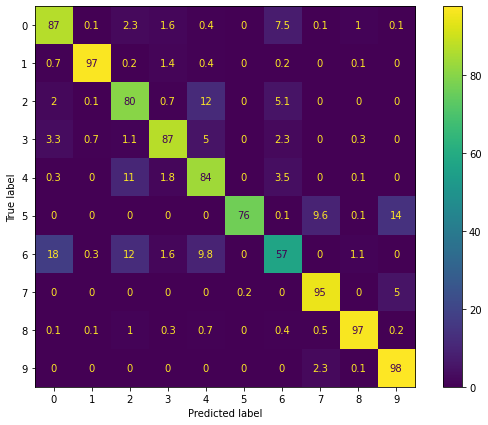

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm1*100)
disp.plot()

## Importing helper functions

In [17]:
!wget https://raw.githubusercontent.com/Waleed-Mujahid/Coding/master/colabUtils.py

--2022-07-18 07:12:33--  https://raw.githubusercontent.com/Waleed-Mujahid/Coding/master/colabUtils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625 (1.6K) [text/plain]
Saving to: ‘colabUtils.py.1’

colabUtils.py.1     100%[===================>]   1.59K  --.-KB/s    in 0s      

2022-07-18 07:12:34 (36.4 MB/s) - ‘colabUtils.py.1’ saved [1625/1625]



In [18]:
from colabUtils import *

## Single Layer Neural Network

### Building our Neural Network



In [19]:
model = Sequential()
model.add(Dense(512, input_shape = x_train_norm[0].shape , activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Fitting the model on Data

In [20]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=['accuracy'])

In [21]:
history = model.fit(x_train_norm, y_train, validation_split=0.1, epochs = 10)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5412 - accuracy: 0.8080 - val_loss: 0.4265 - val_accuracy: 0.8450
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3894 - accuracy: 0.8589 - val_loss: 0.3642 - val_accuracy: 0.8655
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3494 - accuracy: 0.8729 - val_loss: 0.3488 - val_accuracy: 0.8693
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3211 - accuracy: 0.8824 - val_loss: 0.3369 - val_accuracy: 0.8728
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3007 - accuracy: 0.8896 - val_loss: 0.3268 - val_accuracy: 0.8787
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2843 - accuracy: 0.8954 - val_loss: 0.3178 - val_accuracy: 0.8813
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2685 - accuracy: 0.8994 - val_loss: 0.3219 - val_accuracy:

now lets take a look at home our model trained

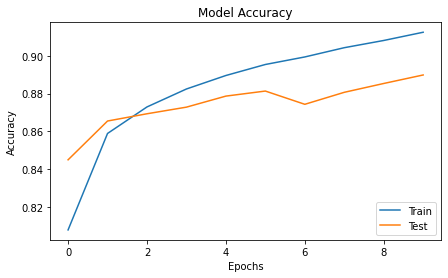

In [22]:
plotAccuracy(history,True)

### Evaluating the Model

In [23]:
loss, accuracy_nn = model.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3281 - accuracy: 0.8846


In [24]:
print(f"The accuracy received on Test data is: {accuracy_nn*100:.2f}%")

The accuracy received on Test data is: 88.46%


In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred2 = model.predict(x_test_norm)
y_pred2 = np.argmax(y_pred2, axis=1)
NN_f1_score = f1_score(y_test,y_pred2, average = 'weighted')
NN_precision_score = precision_score(y_test,y_pred2, average = 'weighted')
NN_recall_score = f1_score(y_test,y_pred2, average = 'weighted')

print(f'F1 score = {NN_f1_score*100:.02f} \nPrecision = {NN_precision_score*100:.02f} \nRecall = {NN_recall_score*100:.02f}')

F1 score = 88.42 
Precision = 88.49 
Recall = 88.42


### Plotting a Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred2, normalize='true')

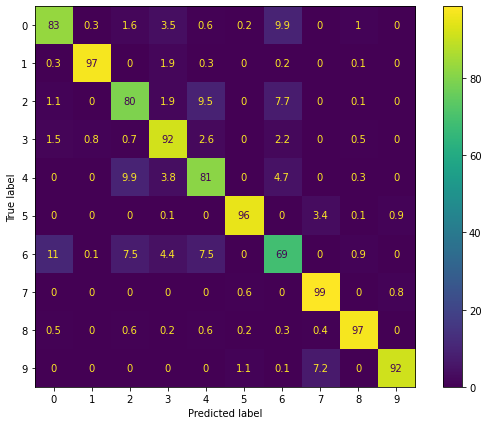

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm2*100)
disp.plot()

## Convulotional Neural Network

First we resize our data bach into 2d images as it is a requirement for Conv layers.

In [28]:
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0],img_size,img_size)
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0],img_size,img_size)

In [29]:
print(x_train_norm.shape,x_test_norm.shape)
print(y_train.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


### Building our CNN

In [32]:
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), padding = 'same' , input_shape=(img_size,img_size,1)))  # Input size of all images must be standard for model
model2.add(keras.layers.Activation('relu'))
model2.add(Conv2D(32, (5, 5), padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(MaxPooling2D(strides=2))
model2.add(Dropout(0.4))

model2.add(Conv2D(64, (5, 5) , padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(Conv2D(64, (5, 5) , padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(MaxPooling2D(strides=2))
model2.add(Dropout(0.4))

model2.add(Conv2D(128, (3, 3) , padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(Conv2D(128, (3, 3) , padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(MaxPooling2D(strides=2))
model2.add(Dropout(0.4))


model2.add(Flatten())
model2.add(Dense(10, activation='softmax')) 

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                      

### Fitting our CNN

In [33]:
model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=['accuracy'])

In [34]:
history2 = model2.fit(x_train_norm, y_train, validation_split=0.1, epochs = 10)

Epoch 1/10
1688/1688 [==============================] - 12s 6ms/step - loss: 0.5663 - accuracy: 0.7915 - val_loss: 0.3492 - val_accuracy: 0.8653
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3651 - accuracy: 0.8653 - val_loss: 0.2979 - val_accuracy: 0.8842
Epoch 3/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3226 - accuracy: 0.8802 - val_loss: 0.2700 - val_accuracy: 0.9008
Epoch 4/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2921 - accuracy: 0.8918 - val_loss: 0.2497 - val_accuracy: 0.9068
Epoch 5/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2787 - accuracy: 0.8975 - val_loss: 0.2593 - val_accuracy: 0.9012
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2659 - accuracy: 0.9010 - val_loss: 0.2380 - val_accuracy: 0.9107
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2547 - accuracy: 0.9047 - val_loss: 0.2245 - val_ac

Now lets take a look at how our model trained.

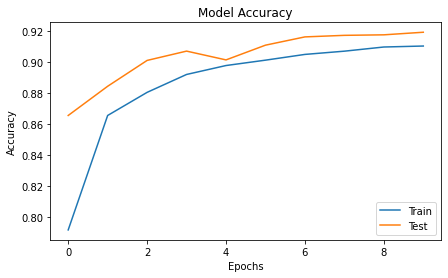

In [42]:
plotAccuracy(history2,True)

### Evaluating our CNN

In [36]:
loss_cnn, accuracy_cnn = model2.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2362 - accuracy: 0.9165


In [37]:
print(f"The accuracy received on Test data is: {accuracy_cnn*100:.2f}%")

The accuracy received on Test data is: 91.65%


In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred3 = model2.predict(x_test_norm)
y_pred3 = np.argmax(y_pred3, axis=1)
CNN_f1_score = f1_score(y_test,y_pred3, average = 'weighted')
CNN_precision_score = precision_score(y_test,y_pred3, average = 'weighted')
CNN_recall_score = f1_score(y_test,y_pred3, average = 'weighted')

print(f'F1 score = {CNN_f1_score*100:.02f} \nPrecision = {CNN_precision_score*100:.02f} \nRecall = {CNN_recall_score*100:.02f}')

F1 score = 91.62 
Precision = 91.61 
Recall = 91.62


Plotting a Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test,y_pred3, normalize='true')

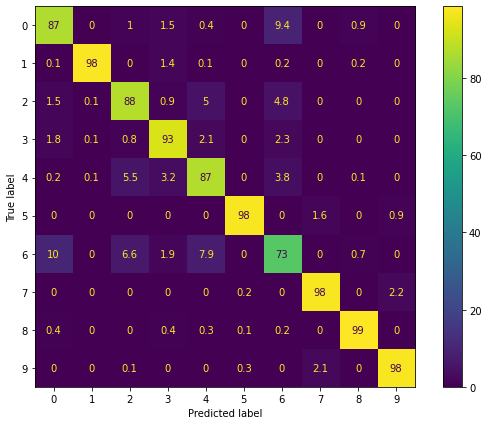

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm3*100)
disp.plot()

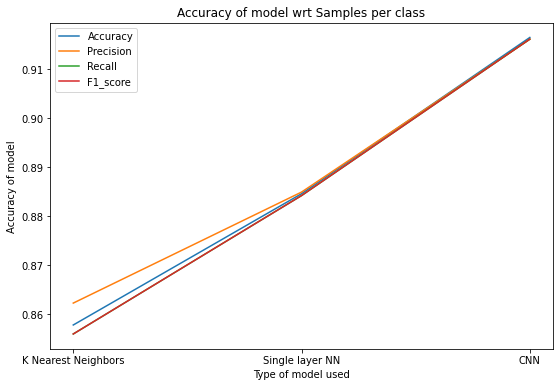

In [41]:
accuracy = [KNN_accuracy,accuracy_nn,accuracy_cnn]
precision = [KNN_precision_score,NN_precision_score,CNN_precision_score]
recall = [KNN_recall_score,NN_recall_score,CNN_recall_score]
f1_score = [KNN_f1_score,NN_f1_score,CNN_f1_score]
x = ['K Nearest Neighbors',"Single layer NN", "CNN"]
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
fig, ax = plt.subplots()
ax.plot(x,accuracy)
ax.plot(x,precision)
ax.plot(x,recall)
ax.plot(x,f1_score)
ax.set_xticks(x)
plt.xlabel("Type of model used")
plt.ylabel("Accuracy of model")
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1_score'], loc='upper left')
plt.title("Accuracy of model wrt Samples per class")
plt.show()